# Network visualization with Python

### you will learn:
### How to read an Excel file in Pandas
### The basics of Networkx

#### Intall networkx by typing the following on your terminal:
#### conda install -c anaconda networkx 
#### requirements: https://networkx.github.io/documentation/networkx-1.9/install.html#requirements

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

#### NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.


In [2]:
'''
Creating a graph
Create an empty graph with no nodes and no edges.
'''

G = nx.Graph()
G

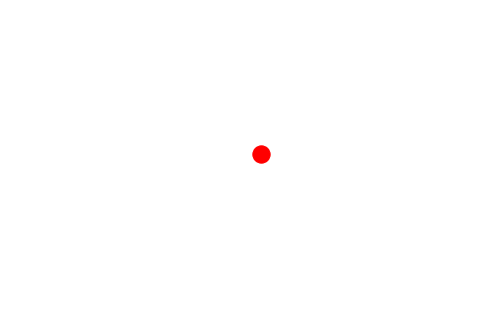

In [3]:
'''
Adding a node
'''
G.add_node(1)
nx.draw(G)
plt.show()

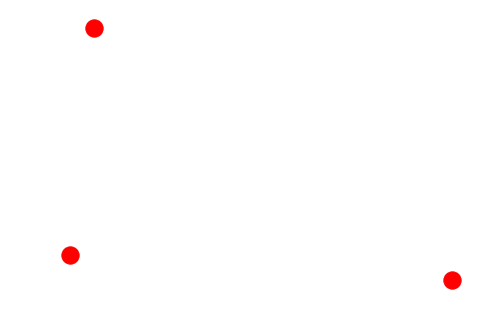

In [4]:
'''
Creating a new graph and adding a list of nodes
'''
G = nx.Graph()
G.add_nodes_from([1,2,3])
nx.draw(G)
plt.show()

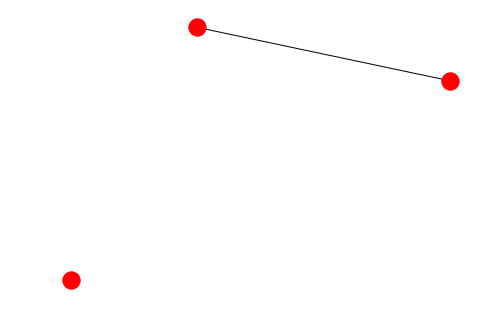

In [5]:
'''
adding edges
'''
G.add_edge(1,2)
nx.draw(G)
plt.show()

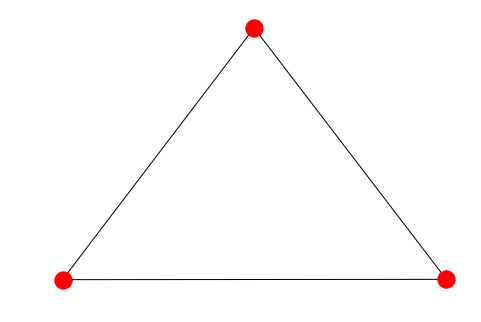

In [6]:
'''
adding edges
'''
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,1)

nx.draw(G)
plt.show()

In [7]:
print("Nodes: " + str(G.nodes()))
print("Edges: " + str(G.edges()))

Nodes: [1, 2, 3]
Edges: [(1, 2), (1, 3), (2, 3)]


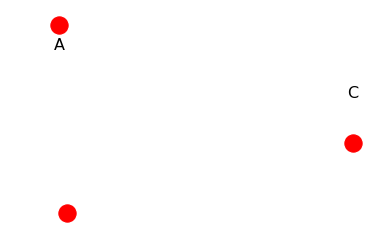

In [8]:
'''
Creating a new graph and adding a list of nodes as strings - label position is not nice!
'''
G = nx.Graph()
G.add_nodes_from(["A","B","C"])
pos = nx.spring_layout(G) # positions for all nodes

nx.draw_networkx_labels(G, pos, font_size=16)
nx.draw(G)
plt.show()

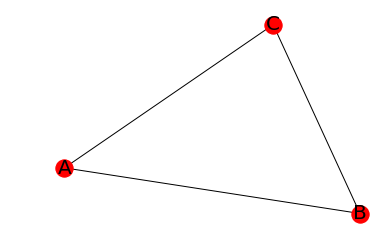

In [9]:
G = nx.Graph()
dic_pos = {0:"A",1:"B",2:"C"}
'''
adding nodes from dictionary
'''
G.add_nodes_from(dic_pos.keys())
G.add_edges_from([(0,1),(1,2),(2,0)])

H   = nx.relabel_nodes(G,dic_pos)
pos = nx.spring_layout(G) # positions for all nodes

nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(H,pos,dic_pos,font_size=20)
plt.axis('off')
plt.show()

In [10]:
df = pd.read_excel('PythonLesson_NetworkViz.xlsx', index_col='ID')

In [11]:
df.head()

,Name,Last name,WeChat ID,Email,tag
ID,,,,,
1,Linda,XiaoBei,xiaobeibei,linda@rm.com,TM
2,Hans,German,germanhans,hans@rm.com,TM
3,Shabnam,Mexico,mexnam,shab@arts.com,Shenzhen
4,Lucy,Sky,skywithdimonds,lucy@sz.com,Shenzhen
5,Peter,Tattoo,tafoo,peter@rm.com,TM


In [45]:
G = nx.from_pandas_edgelist(df, source='Name', target='tag')

Nodes of graph: 
['Linda', 'TM', 'Hans', 'Shabnam', 'Shenzhen', 'Lucy', 'Peter', 'Mark', 'Jason', 'LL', 'Saulo', 'Claire', 'Henk']
Edges of graph: 
[('Linda', 'TM'), ('TM', 'Hans'), ('TM', 'Peter'), ('TM', 'Henk'), ('Shabnam', 'Shenzhen'), ('Shenzhen', 'Lucy'), ('Shenzhen', 'Mark'), ('Shenzhen', 'Claire'), ('Jason', 'LL'), ('LL', 'Saulo')]


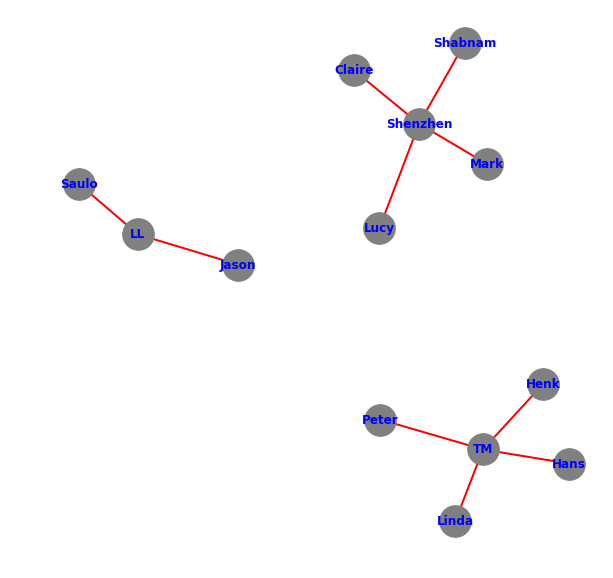

In [54]:
fig, ax = plt.subplots(figsize=(10,10))

H   = nx.relabel_nodes( G, df.Name )
pos = nx.spring_layout(G, k=.5, weight='length') # positions for all nodes

print("Nodes of graph: ")
print(H.nodes())
print("Edges of graph: ")
print(H.edges())

nx.ego_graph(G=G, n='TM', radius=3)
nx.draw_networkx_nodes(G,
                       pos,
                       node_size=1000,
                       node_color='gray',
                       ax=ax)
nx.draw_networkx_edges(G,
                       pos,
                       width=2,
                       edge_color='r',
                       ax=ax)
nx.draw_networkx_labels(H,
                        pos,
                        font_color='b',
                        font_weight='bold',
                        fontsize=25)

plt.axis('off')
plt.show()